# 예비 창업자를 위한 제주도 시장, 소비자 분석


### 변수
- DataFrame 에서 살펴볼 변수  
    - 업종 <-> 이용금액  
    - 이용자 구분 <-> 매출액  
    - 연령별 <-> 매출액  
    - 년월(계절) <-> 매출액   
    - 유동인구 <-> 매출액 #유동인구를 살펴볼 수 있는 변수가 어떤 변수인지 모르겠음. 



### 최종 목표: 
##### 제주도에서 창업을 예정하고 있는 예비창업자를 위한 인사이트 제공  
##### ex) 어느 위치에 창업을 하는 게 좋을까? , 어떤 업종을 해야 높은 매출을 기록할까?, 어떤 고객을 타겟으로 해야할까?, 어떤 홍보 수단을 이용해야 할까?





In [16]:
#데이터 프레임 불러오기
import pandas as pd

df = pd.read_csv('C:\\study\\workspace_python\pdsample\\visualization_1.csv', encoding = 'cp949')


In [17]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'


In [19]:
df.head()

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자
0,2017-01,서귀포시,도심,강정동,G47121,슈퍼마켓,제주도민,도민,50.0,여성,365160,214,소매업,2020-12-15
1,2017-01,제주시,도심,삼도일동,I55112,여관업,제주도민,도민,60.0,여성,40000,1610,숙박업,2020-12-15
2,2017-01,제주시,도심,삼양이동,I55112,여관업,제주도민,도민,20.0,여성,162000,1610,숙박업,2020-12-15
3,2017-01,제주시,도심,삼양이동,I55112,여관업,제주도민,도민,50.0,남성,70000,1610,숙박업,2020-12-15
4,2017-01,제주시,도심,삼도이동,I55112,여관업,내국인,개별,40.0,남성,3150460,1610,숙박업,2020-12-15


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642619 entries, 0 to 1642618
Data columns (total 14 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   년월       1642619 non-null  object 
 1   시도명      1642619 non-null  object 
 2   지역구분     1642619 non-null  object 
 3   읍면동명     1642619 non-null  object 
 4   업종코드     1642619 non-null  object 
 5   업종명      1642619 non-null  object 
 6   이용자 구분   1642619 non-null  object 
 7   관광구분     1594696 non-null  object 
 8   연령대      1509360 non-null  float64
 9   성별       1642619 non-null  object 
 10  이용금액     1642619 non-null  int64  
 11  매장수      1642619 non-null  int64  
 12  업종명 대분류  1642174 non-null  object 
 13  데이터기준일자  1642619 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 175.5+ MB


데이터 칼럼 살펴본 후 의미있는 변수들을 몇 개 선정하여 이 데이터들을 살펴보기로 결정  
소비자의 국적, 연령, 성별에 따라서 이용금액이 다를 거라고 가정  
업종의 종류에 따라서 이용금액도 다를 것이라 가정    
날짜에 따라서도 이용금액이 달라질 것이라 가정  

1) 이용자구분 <-> 이용금액  
2) 연령별,성별 <-> 이용금액   
3) 업종명 <-> 이용금액(건수, 매출액)  
4) 날짜에서 계절 추출 <-> 매출액



# 변수 분석 (1)

- 이용자 구분
- 매출액


### 이용자 구분 변수

In [40]:
#제주도민, 내국인, 중국, 법인, 동남아, 일본, 기타외국인 => 총 6개의 종류를 가짐

df['이용자 구분'].unique()
df['이용자 구분'].value_counts()

내국인     972845
제주도민    551514
법인      104868
중국        6557
기타외국      3908
일본        1625
동남아       1302
Name: 이용자 구분, dtype: int64

In [70]:
# 이용자 수는 대한민국 국적인 사람들이 가장 많다.
# 대한민국 국민들 중에서도 제주도민들보단 내국인들이 더 많은 건수의 소비를 보인다.

df['이용자 구분'].value_counts()
print('대한민국 국적의 개인 소비자 수 : ',len(df[df['이용자 구분'] == '내국인']) + len(df[df['이용자 구분'] == '제주도민']))
print('외국 국적의 소비자 수 : ', len(df[df['이용자 구분'] == '중국']) + len(df[df['이용자 구분'] == '기타외국']) + len(df[df['이용자 구분'] == '일본']) + len(df[df['이용자 구분'] == '동남아']))

대한민국 국적의 개인 소비자 수 :  1524359
외국 국적의 소비자 수 :  13392


<AxesSubplot:title={'center':'이용자 구분 별 상대도수'}, ylabel='이용자 구분'>

<Figure size 1080x576 with 0 Axes>

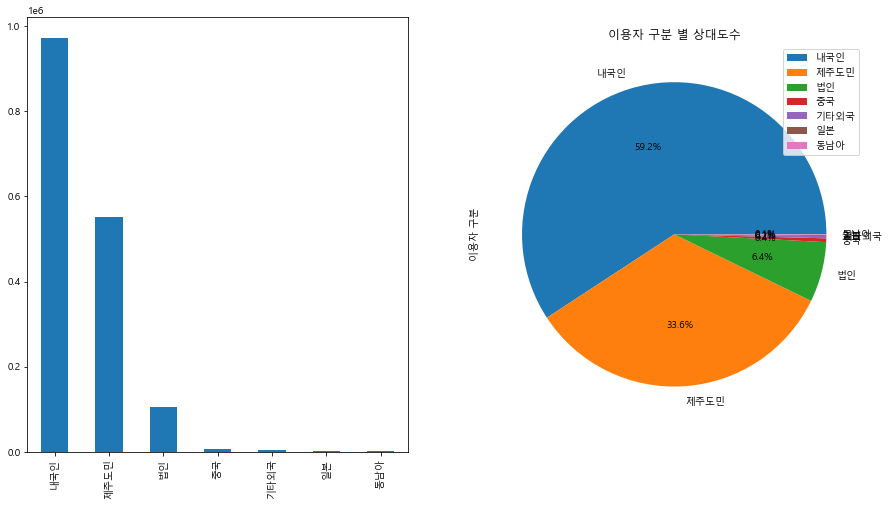

In [99]:
#앞선 정보를 시각화
#`이용자 구분` 변수들의 범주별 도수와 상대도수 확인

a = df['이용자 구분'].value_counts()
plt.figure(figsize = (15,8))
fig, ax = plt.subplots(1,2)
a.plot(kind = 'bar', ax = ax[0])
a.plot(kind = 'pie', ax = ax[1], figsize = (15,8), legend = True,autopct = '%1.1f%%',title = '이용자 구분 별 상대도수' )

### 이용금액 변수

In [108]:
#구간데이터로 이루어진 칼럼이기 때문에 기초통계 수치 확인

df.describe()

,연령대,이용금액,매장수
count,1.509360e+06,1.642619e+06,1.642619e+06
mean,4.239816e+01,4.060520e+06,8.021465e+02
std,1.720981e+01,2.283080e+07,1.439810e+03
min,1.000000e+01,1.000000e+01,1.000000e+00
25%,3.000000e+01,8.850000e+04,1.530000e+02
50%,4.000000e+01,3.960000e+05,3.590000e+02
75%,6.000000e+01,1.776000e+06,7.020000e+02
max,7.000000e+01,3.102095e+09,7.030000e+03


{'whiskers': [<matplotlib.lines.Line2D at 0x26c0c004070>,
 'caps': [<matplotlib.lines.Line2D at 0x26c0c004730>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c0bfd2dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x26c0c004df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c0c011190>],
 'means': []}

<Figure size 1080x576 with 0 Axes>

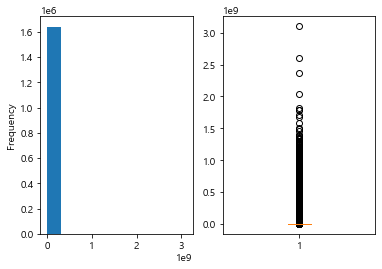

In [150]:
#분포를 제대로 보기 위해서 boxplot 사용
#이상치가 많이 보임 => 삼백억을 쓴 사람도 있었어요.

#따라서 히스토그램과 박스 플롯이 잘 나타나지 않음

plt.figure(figsize = (15,8))
fig, ax = plt.subplots(1,2)

df['이용금액'].plot(kind = 'hist', ax = ax[0])
plt.boxplot(df['이용금액'])


In [152]:
#1분위수와 3분위수 사이에 있는 데이터만 추출하여 DataFrame 만들어보기

first_quantile = df['이용금액'].quantile(0.25)
third_quantile = df['이용금액'].quantile(0.75)
print('1분위수 : ', first_quantile)
print('3분위수 : ', third_quantile)

df_quantile = df[(df['이용금액'] >= first_quantile) & (df['이용금액'] <= third_quantile)]
df_quantile.head(3)

1분위수 :  88500.0
3분위수 :  1776000.0


,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,데이터기준일자
0,2017-01,서귀포시,도심,강정동,G47121,슈퍼마켓,제주도민,도민,50.0,여성,365160,214,소매업,2020-12-15
2,2017-01,제주시,도심,삼양이동,I55112,여관업,제주도민,도민,20.0,여성,162000,1610,숙박업,2020-12-15
5,2017-01,제주시,도심,삼도이동,I55112,여관업,내국인,개별,60.0,남성,728470,1610,숙박업,2020-12-15


{'whiskers': [<matplotlib.lines.Line2D at 0x26c0c911a00>,
 'caps': [<matplotlib.lines.Line2D at 0x26c0c91a100>,
 'boxes': [<matplotlib.lines.Line2D at 0x26c0c8e3f10>],
 'medians': [<matplotlib.lines.Line2D at 0x26c0c91a7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26c0c91ab20>],
 'means': []}

<Figure size 1080x576 with 0 Axes>

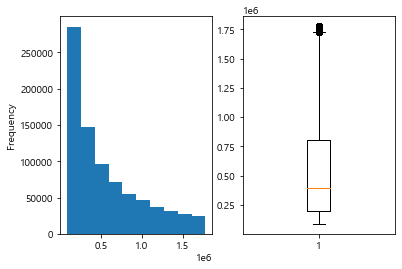

In [154]:
#25만원 이상의 이용금액을 이용한 사람이 많음

plt.figure(figsize = (15,8))
fig, ax = plt.subplots(1,2)

df_quantile['이용금액'].plot(kind = 'hist', ax = ax[0])
plt.boxplot(df_quantile['이용금액'])


C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'이용금액 distribution'}, xlabel='이용금액', ylabel='Density'>

C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ca_da\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


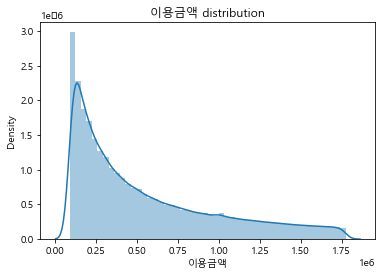

In [155]:
#이상치를 제거하고 분포 모양을 선으로 확인해보면 양의 방향으로 비대칭 모양을 가지고 있음

plt.title('이용금액 distribution')
sns.distplot(df_quantile['이용금액'])

C:\ca_da\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='이용금액', ylabel='Density'>

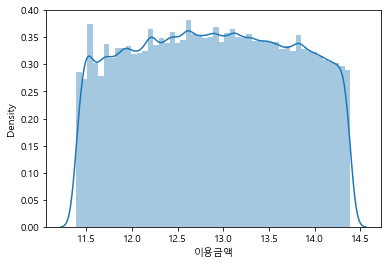

In [156]:
#이용금액을 뭔가 종속변수로 할 거 같아서 한번 로그로 정규분포로 만들어보려고함.
#로그 취해도 정규분포 모양이 안됨....
#다른 방식 아시나요..

sns.distplot(np.log1p(df_quantile['이용금액']))

#  변수분석(2)

- 연령별 <-> 매출액

### 연령 변수 

In [162]:
df.describe()

,연령대,이용금액,매장수
count,1.509360e+06,1.642619e+06,1.642619e+06
mean,4.239816e+01,4.060520e+06,8.021465e+02
std,1.720981e+01,2.283080e+07,1.439810e+03
min,1.000000e+01,1.000000e+01,1.000000e+00
25%,3.000000e+01,8.850000e+04,1.530000e+02
50%,4.000000e+01,3.960000e+05,3.590000e+02
75%,6.000000e+01,1.776000e+06,7.020000e+02
max,7.000000e+01,3.102095e+09,7.030000e+03


<AxesSubplot:ylabel='연령대'>

<Figure size 1440x720 with 0 Axes>

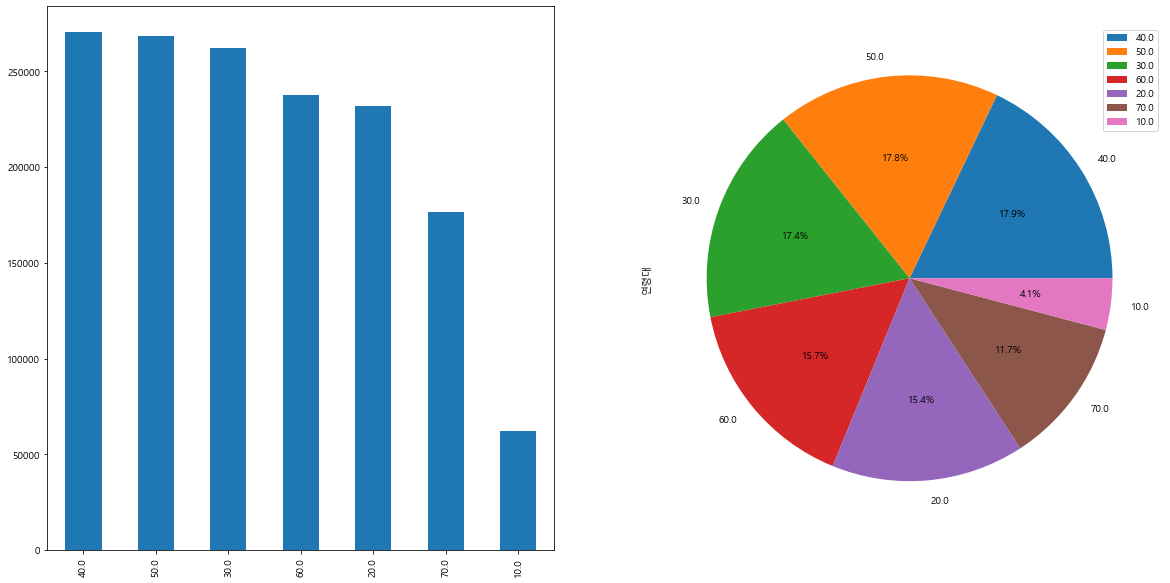

In [179]:
#가장 높은 비율의 도수를 보이는 연령대는 40대
plt.figure(figsize = (20,10))
fig, ax = plt.subplots(1,2)
a = df['연령대'].value_counts()
a.plot(kind = 'bar', ax = ax[0])
a.plot(kind = 'pie', ax = ax[1], figsize = (20,10), autopct = '%1.1f%%', legend = True)


<AxesSubplot:xlabel='연령대', ylabel='이용금액'>

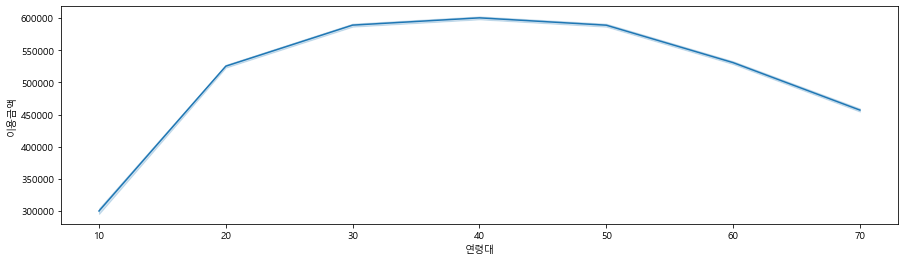

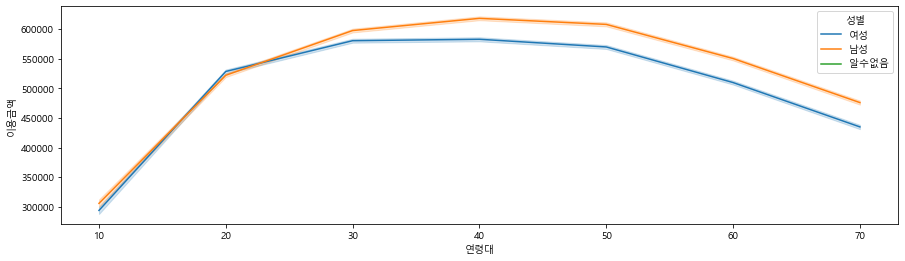

In [186]:
#연령대별 매출액
#40대가 가장 많은 이용금액을 보임
# 30 ~ 50이 소비가 활발

plt.figure(figsize = (15,4))
sns.lineplot(data = df_quantile, x = '연령대', y = '이용금액')


#연령대별 성별 매출액
#남성이 여성보다 소비가 더 많음
#여성은 30대가 이용금액이 더 큼
plt.figure(figsize = (15,4))
sns.lineplot(data = df_quantile, x = '연령대', y = '이용금액', hue = '성별')

# 변수분석 (3)

업종명 대분류 <-> 매출액

### 업종명, 업종명 대분류 변수

In [188]:
df['업종명'].value_counts()

한식 음식점업                    125829
체인화 편의점                    122116
슈퍼마켓                       101028
서양식 음식점업                    95056
차량용 주유소 운영업                 85088
비알콜 음료점업                    78036
빵 및 과자류 소매업                 77803
과실 및 채소 소매업                 76730
중식 음식점업                     72207
일식 음식점업                     67912
피자, 햄버거, 샌드위치 및 유사 음식점업     63500
수산물 소매업                     55188
육류 소매업                      53222
스포츠 및 레크레이션 용품 임대업          53188
기타 외국식 음식점업                 49896
여관업                         47398
기타음식료품위주종합소매업               41549
관광 민예품 및 선물용품 소매업           39452
화장품 및 방향제 소매업               37020
차량용 가스 충전업                  36780
욕탕업                         34876
전시 및 행사 대행업                 33959
기타 주점업                      27376
일반유흥 주점업                    26544
건강보조식품 소매업                  16583
휴양콘도 운영업                    15765
그외 기타 종합 소매업                15482
호텔업                         14970
자동차 임대업                     14958
골프장 운영업       

In [191]:
df['업종명'].unique()

array(['슈퍼마켓', '여관업', '한식 음식점업', '관광 민예품 및 선물용품 소매업', '화장품 및 방향제 소매업',
       '호텔업', '중식 음식점업', '일식 음식점업', '빵 및 과자류 소매업', '과실 및 채소 소매업',
       '수산물 소매업', '차량용 가스 충전업', '차량용 주유소 운영업', '스포츠 및 레크레이션 용품 임대업',
       '그외 기타 종합 소매업', '기타 대형 종합 소매업', '비알콜 음료점업', '욕탕업',
       '그외 기타 분류안된 오락관련 서비스업', '그외 기타 스포츠시설 운영업', '정기 항공 운송업', '휴양콘도 운영업',
       '기타 갬블링 및 베팅업', '버스 운송업', '골프장 운영업', '내항 여객 운송업', '마사지업',
       '자동차 임대업', '건강보조식품 소매업', '전시 및 행사 대행업', '여행사업', '서양식 음식점업',
       '기타 외국식 음식점업', '일반유흥 주점업', '피자, 햄버거, 샌드위치 및 유사 음식점업', '기타 주점업',
       '체인화 편의점', '육류 소매업', '기타음식료품위주종합소매업', '면세점', '기타 수상오락 서비스업',
       '택시 운송업'], dtype=object)

In [202]:
df['업종명 대분류'].value_counts()

소매업     856196
음식점업    528320
서비스업    105452
숙박업      78133
임대업      68146
운송업       5927
Name: 업종명 대분류, dtype: int64

<AxesSubplot:title={'center':'업종명 대분류 상대도수'}, ylabel='업종명 대분류'>

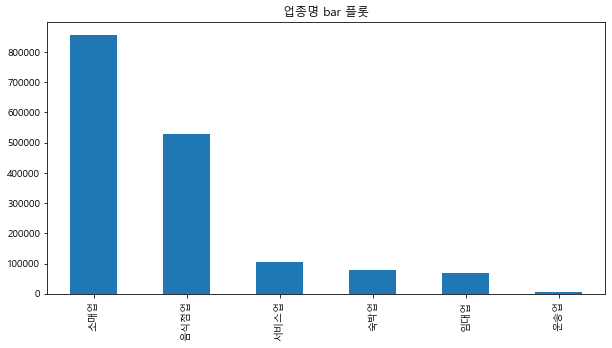

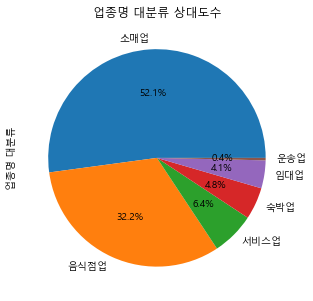

In [217]:
type_store = df['업종명 대분류'].value_counts()


plt.figure(figsize = (10,5))
type_store.plot(kind = 'bar', title = '업종명 bar 플롯')
plt.figure(figsize = (10,5))
type_store.plot(kind = 'pie', title = '업종명 대분류 상대도수', autopct = '%.1f%%')


<AxesSubplot:xlabel='연령대', ylabel='이용금액'>

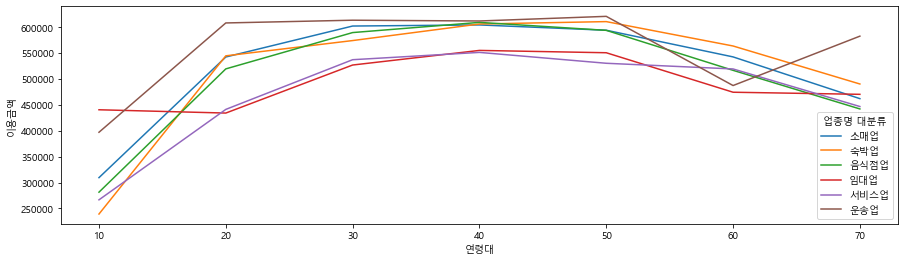

In [236]:
plt.figure(figsize = (15,4))
sns.lineplot(data = df_quantile, x = '연령대', y = '이용금액', hue = '업종명 대분류', ci = None)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642619 entries, 0 to 1642618
Data columns (total 14 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   년월       1642619 non-null  object 
 1   시도명      1642619 non-null  object 
 2   지역구분     1642619 non-null  object 
 3   읍면동명     1642619 non-null  object 
 4   업종코드     1642619 non-null  object 
 5   업종명      1642619 non-null  object 
 6   이용자 구분   1642619 non-null  object 
 7   관광구분     1594696 non-null  object 
 8   연령대      1509360 non-null  float64
 9   성별       1642619 non-null  object 
 10  이용금액     1642619 non-null  int64  
 11  매장수      1642619 non-null  int64  
 12  업종명 대분류  1642174 non-null  object 
 13  데이터기준일자  1642619 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 175.5+ MB
